In [1]:
## Data source
# https://www.kaggle.com/wendykan/lending-club-loan-data

### EDA

In [2]:
## load required packages
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns

In [3]:
## Load the dataset 
import os 
os.chdir(r'D:/Dataset/kaggle_Lending Club Loan Data')

loan = pd.read_csv('loan.csv')

print(loan.head())

# 74 columns?
# there may be some errors with reading the dataset 

C:\Users\user\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599     5000.0       5000.0           4975.0   36 months   
1  1077430    1314167     2500.0       2500.0           2500.0   60 months   
2  1077175    1313524     2400.0       2400.0           2400.0   36 months   
3  1076863    1277178    10000.0      10000.0          10000.0   36 months   
4  1075358    1311748     3000.0       3000.0           3000.0   60 months   

   int_rate  installment grade sub_grade     ...      total_bal_il il_util  \
0     10.65       162.87     B        B2     ...               NaN     NaN   
1     15.27        59.83     C        C4     ...               NaN     NaN   
2     15.96        84.33     C        C5     ...               NaN     NaN   
3     13.49       339.31     C        C1     ...               NaN     NaN   
4     12.69        67.79     B        B5     ...               NaN     NaN   

  open_rv_12m  open_rv_24m max_bal_bc all_util total_rev_hi_li

In [4]:
## check the errors causing the wrong number of columns
print(loan.columns)
print(len(loan.columns))

# get the right column names
correct_col = 'index, id, member_id, loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, pymnt_plan, url, desc, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, mths_since_last_delinq, mths_since_last_record, open_acc, pub_rec, revol_bal, revol_util, total_acc, initial_list_status, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, last_credit_pull_d, collections_12_mths_ex_med, mths_since_last_major_derog, policy_code, application_type, annual_inc_joint, dti_joint, verification_status_joint, acc_now_delinq, tot_coll_amt, tot_cur_bal, open_acc_6m, open_il_6m, open_il_12m, open_il_24m, mths_since_rcnt_il, total_bal_il, il_util, open_rv_12m, open_rv_24m, max_bal_bc, all_util, total_rev_hi_lim, inq_fi, total_cu_tl, inq_last_12m'
correct_col = correct_col.split(',')
correct_col = [x.strip() for x in correct_col]
print(correct_col)
print(len(correct_col))

# get the difference between them 
print(np.setdiff1d(np.array(correct_col), np.array(loan.columns))) # the array with more elements is put as the former parameter

# the index column is the difference
# this doesn't matter 

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [5]:
## Column: id 
print(len(loan))
print(len(np.unique(loan['id']))) # the outcome indicates that the id means individual case 

887379
887379


In [6]:
## Column: member_id
print(len(np.unique(loan['member_id']))) # no duplicated members 

887379


count    887379.000000
mean      14755.264605
std        8435.455601
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: loan_amnt, dtype: float64


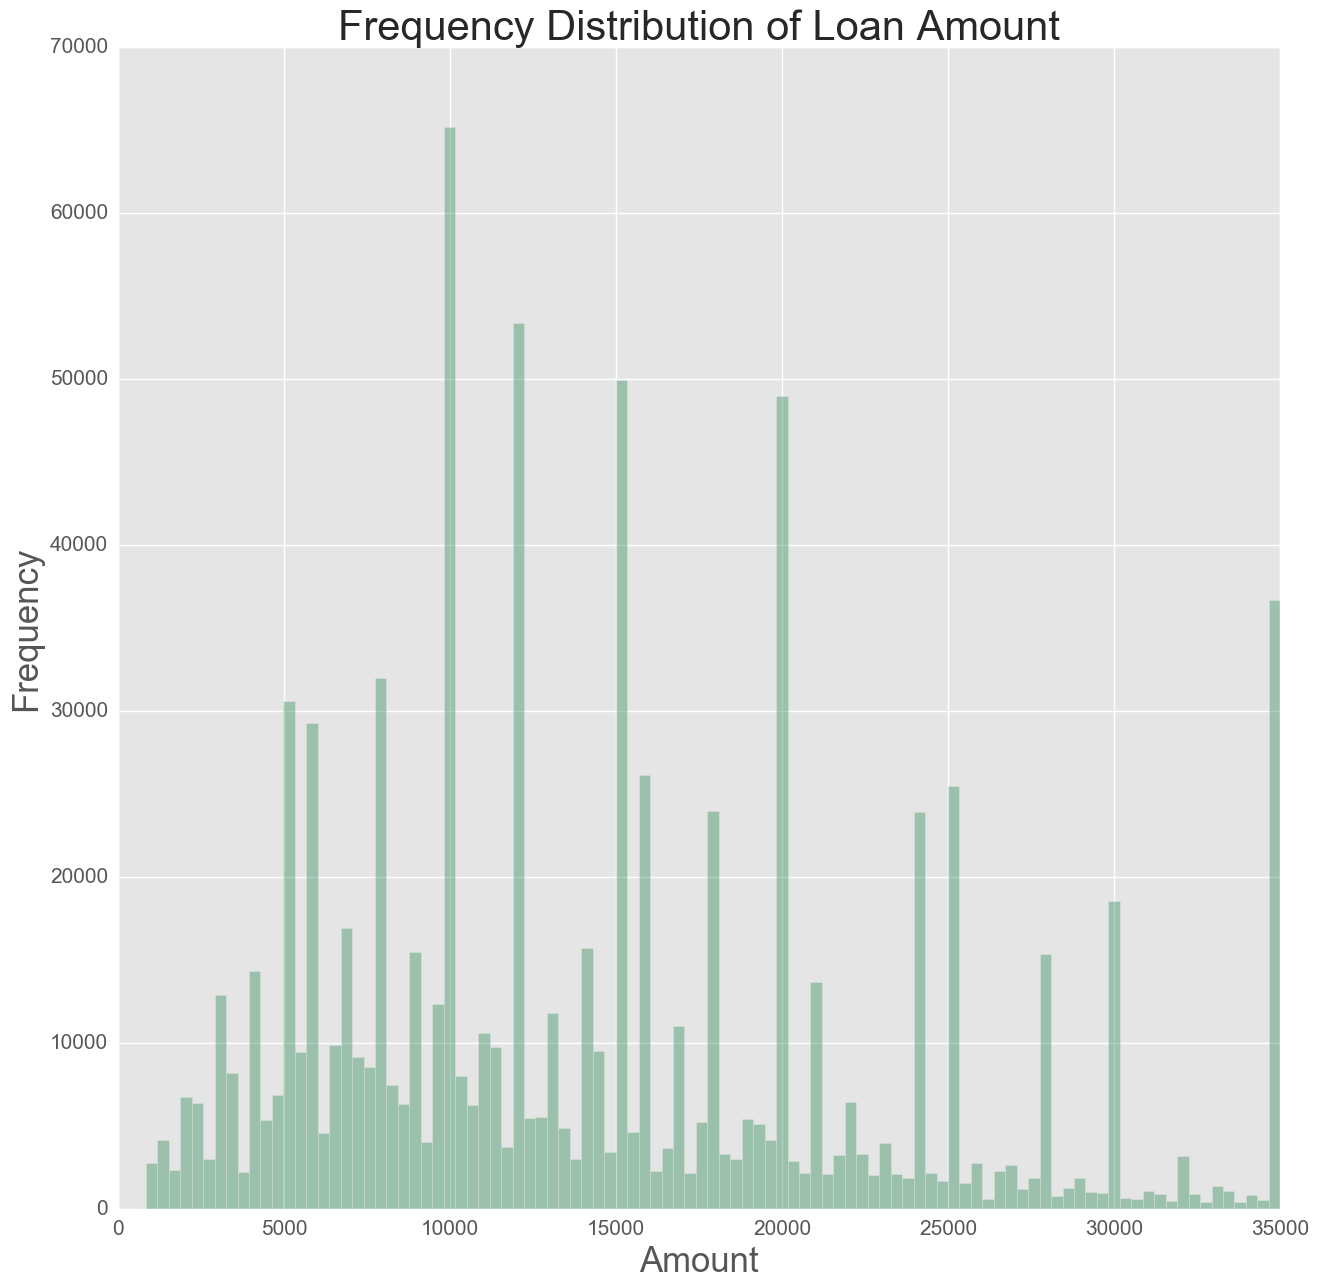

In [13]:
## Column: loan_amnt
print(loan['loan_amnt'].describe()) # looks like the distribution is near normal 

# visualization: the distribution of loan amount 
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['loan_amnt'], bins=100, kde=False, color='#2E8B57')
axes.set_title('Frequency Distribution of Loan Amount', fontsize=30)
axes.set_xlabel('Amount', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('loan_amount_distribution.png', dpi=300) # there are some amounts with extremely high frequency

count    887379.000000
mean      14741.877625
std        8429.897657
min         500.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt, dtype: float64


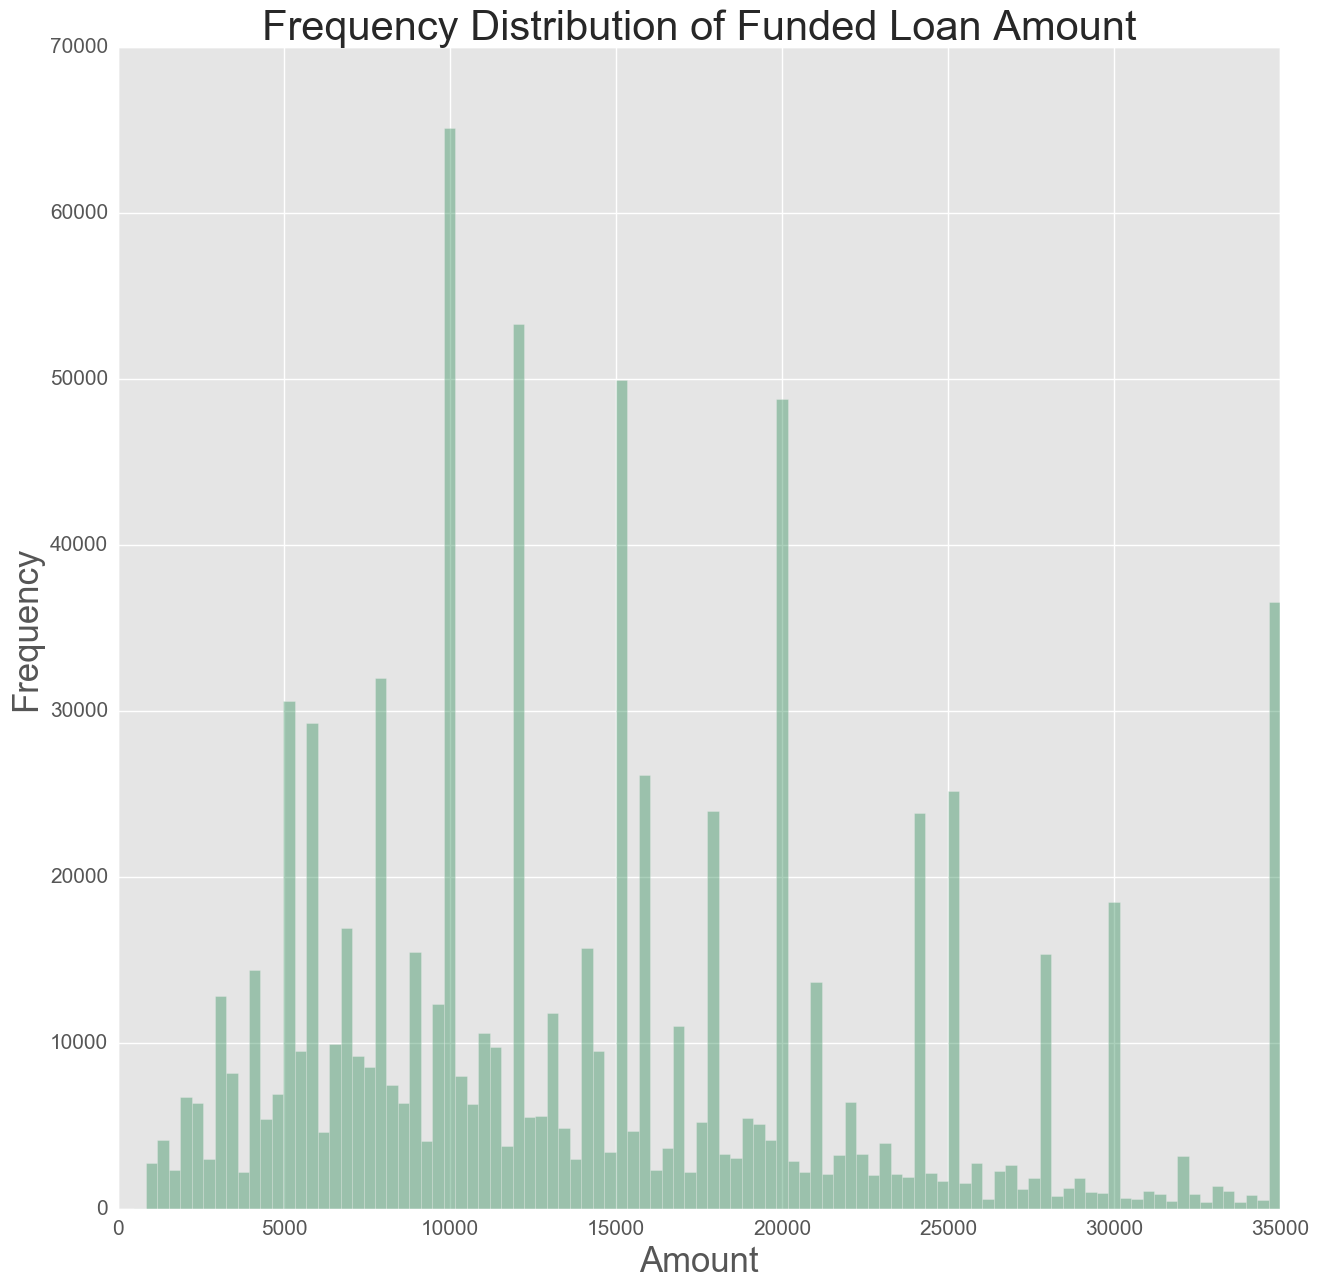

In [14]:
## Column: funded_amnt
print(loan['funded_amnt'].describe()) # looks like the distribution is near normal 

# visualization: the distribution of loan amount 
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['funded_amnt'], bins=100, kde=False, color='#2E8B57')
axes.set_title('Frequency Distribution of Funded Loan Amount', fontsize=30)
axes.set_xlabel('Amount', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('Funded_loan_amount_distribution.png', dpi=300) # there are some amounts with extremely high frequency

count    887379.000000
mean      14702.464383
std        8442.106732
min           0.000000
25%        8000.000000
50%       13000.000000
75%       20000.000000
max       35000.000000
Name: funded_amnt_inv, dtype: float64


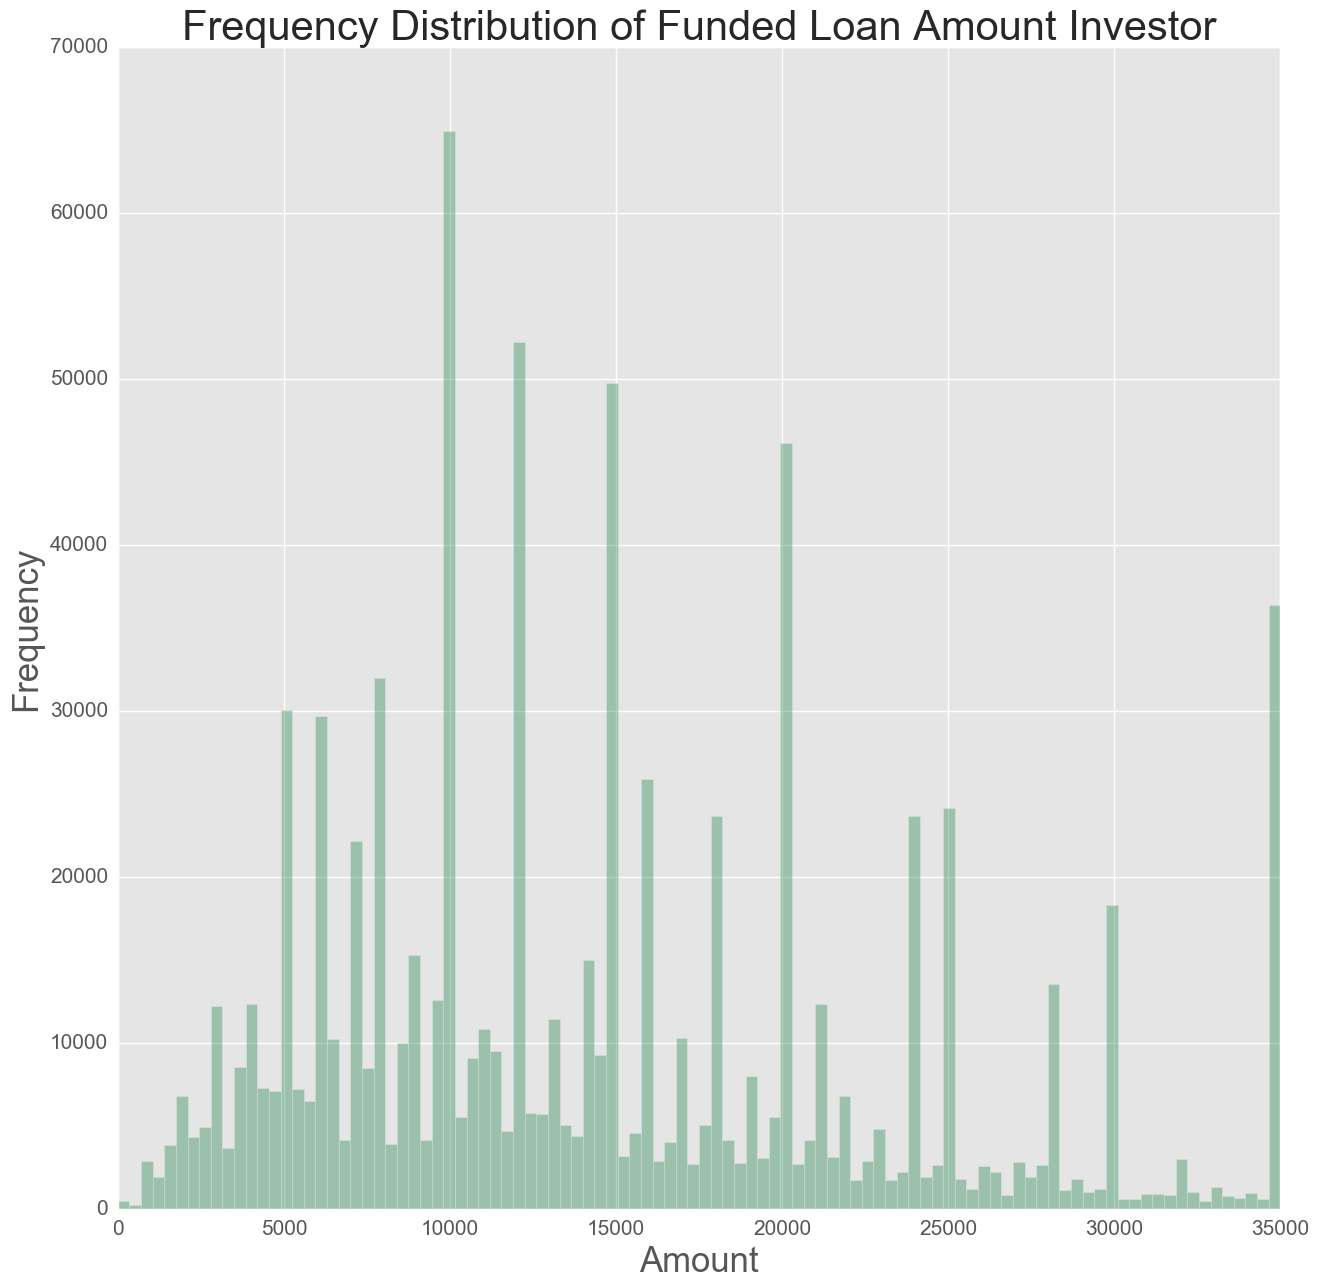

In [15]:
## Column: funded_amnt_inv
print(loan['funded_amnt_inv'].describe()) # looks like the distribution is near normal 

# visualization: the distribution of loan amount 
import matplotlib
matplotlib.style.use('ggplot')   
fig, axes = plt.subplots(figsize=[15, 15])
axes.tick_params(labelsize=15)
sns.distplot(loan['funded_amnt_inv'], bins=100, kde=False, color='#2E8B57')
axes.set_title('Frequency Distribution of Funded Loan Amount Investor', fontsize=30)
axes.set_xlabel('Amount', fontsize=25)
axes.set_ylabel('Frequency', fontsize=25)
#plt.savefig('Funded_loan_amount_inv_distribution.png', dpi=300) # there are some amounts with extremely high frequency

#### The overall trend of the first two graphs a almost alike and the third one has some different places to note (at the place between 5000 to 7500, it has high frequencies).

In [18]:
## Column: term 
print(len(loan['term']))
print(loan['term'].value_counts()) # it only has two types of term, 36 and 60 months 

887379
 36 months    621125
 60 months    266254
Name: term, dtype: int64
